LIBRARY AND MODULE EXPLANATION

# Data Handling

In [3]:
import pandas as pd
import numpy as np


pandas: Used to load, clean, and analyze data in DataFrames.

numpy: Provides support for numerical operations like arrays, means, standard deviations, etc.

# Visualization

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


matplotlib.pyplot: Basic plotting (scatter plots, line plots, histograms).

%matplotlib inline: Ensures that plots show inside the Jupyter notebook.

seaborn: Advanced visualization (pairplots, heatmaps, distribution plots).

# Statistical Analysis

In [12]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf


statsmodels.api: Used to build regression models with statistical outputs like p-values, confidence intervals, etc.

smf: Allows regression using formula-style syntax like in R (e.g., 'Y ~ X1 + X2').

# Preprocessing & Modeling

In [18]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


preprocessing: Used for scaling, encoding, and preparing data.

LinearRegression: Scikit-learn’s implementation of linear regression.

train_test_split: Splits the data into training and testing subsets.

# Evaluation Metrics


In [22]:
from sklearn.metrics import mean_squared_error, r2_score


mean_squared_error: Measures average squared difference between actual and predicted values.

r2_score: Determines how well the model explains the variance in the target variable.



# data load

In [29]:
df = pd.read_csv("salary_data.csv")

In [31]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## Basic Steps of EDA

In [35]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [56]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [38]:
print("Number of features (columns):", len(df.columns))


Number of features (columns): 2


In [46]:
print("Number of features (columns):", (df.columns))


Number of features (columns): Index(['YearsExperience', 'Salary'], dtype='object')


In [48]:
print("Feature names:", df.columns.tolist())


Feature names: ['YearsExperience', 'Salary']


In [50]:
print("Shape of dataset (rows, columns):", df.shape)


Shape of dataset (rows, columns): (30, 2)


In [52]:
print("Data types:\n", df.dtypes)


Data types:
 YearsExperience    float64
Salary             float64
dtype: object


In [54]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 YearsExperience    0
Salary             0
dtype: int64


In [58]:

print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [60]:
missing = df.isnull().sum()
missing[missing > 0]  # Columns with missing values

Series([], dtype: int64)

Handling Missing Values and Outliers

## Missing Values:

In [73]:
# Example: Fill missing numerical values with mean
#df['ColumnName'] = df['ColumnName'].fillna(df['ColumnName'].mean())

# Or drop missing rows
df = df.dropna()


Outlier Detection (using IQR):

## Encoding Categorical Variables

Histogram with KDE using Salary Dataset

### For Salary:

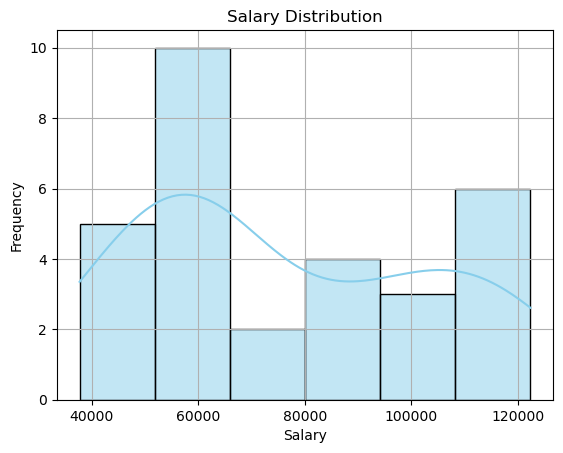

In [81]:


sns.histplot(df['Salary'], kde=True, color='skyblue')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


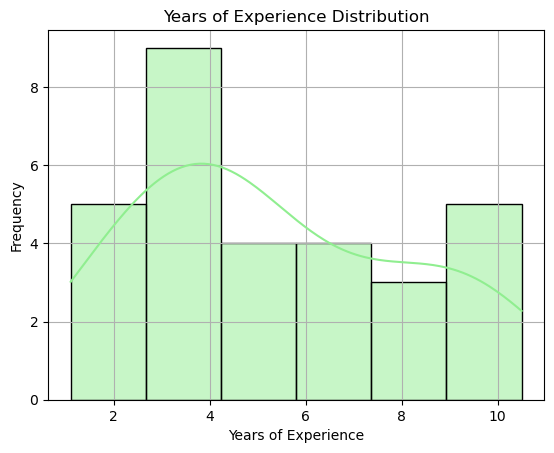

In [83]:
sns.histplot(df['YearsExperience'], kde=True, color='lightgreen')
plt.title('Years of Experience Distribution')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


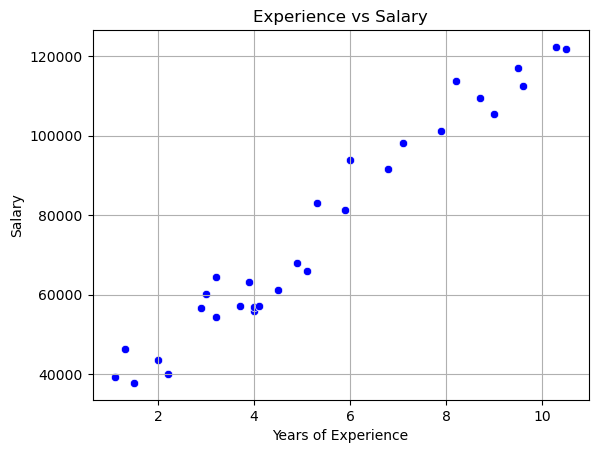

In [85]:
sns.scatterplot(x='YearsExperience', y='Salary', data=df, color='blue')
plt.title("Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.show()


## Define Features and Target


In [88]:
X = df[['YearsExperience']]  # Feature (must be 2D)
y = df['Salary']             # Target (1D)


✅ Why X Must Be 2D (Even with One Feature)
🔹 Think of it like a table:
Machine learning models expect X to be in the form of a table — rows = samples, columns = features.

So even if there's only one feature, it still needs to look like a table with one column.

✅ Correct Way:

X = df[['YearsExperience']]  # ✅ 2D — DataFrame (shape: [30, 1])
Double brackets [[ ]] create a DataFrame (like a table).

Shape becomes: 30 rows × 1 column

❌ Incorrect Way:
X = df['YearsExperience']  # ❌ 1D — Series (shape: [30,])
Single bracket [ ] gives a Series (like a list).

This is not accepted by scikit-learn's .fit() method for X.

✅ Why y is 1D:
y = df['Salary']  # ✅ 1D — Series (shape: [30,])
The model expects y as a single output value per row — which fits perfectly as a 1D list/array.

🧠 Tip to Remember:
X = Table → 2D

y = Column of answers → 1D



In [94]:
X.shape

(30, 1)

In [96]:
y.shape

(30,)

Split the Data

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


Train the Model

In [103]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Print Coefficients

In [106]:
print("Intercept (β₀):", model.intercept_)
print("Slope (β₁):", model.coef_[0])


Intercept (β₀): 25243.60315167621
Slope (β₁): 9509.996327102479


# Predict and Compare

In [110]:
y_pred = model.predict(X_test)

comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)


      Actual      Predicted
7    54445.0   55675.591398
22  101302.0  100372.574136
18   81363.0   81352.581482
14   61111.0   68038.586624
1    46205.0   37606.598377
21   98273.0   92764.577074


# Evaluate the Model

In [113]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root MSE: {rmse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 25774164.36715451
Root MSE: 5076.826210060229
R² Score: 0.9429269163491424


### Visualize the Regression Line

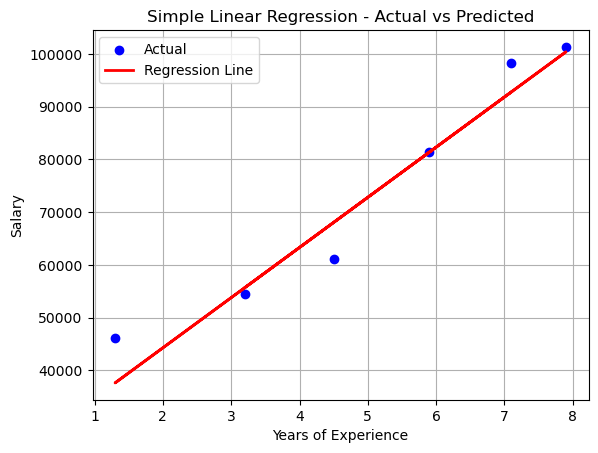

In [125]:


# Plotting the actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Plotting the regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

# Labels and title
plt.title("Simple Linear Regression - Actual vs Predicted")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()

plt.show()


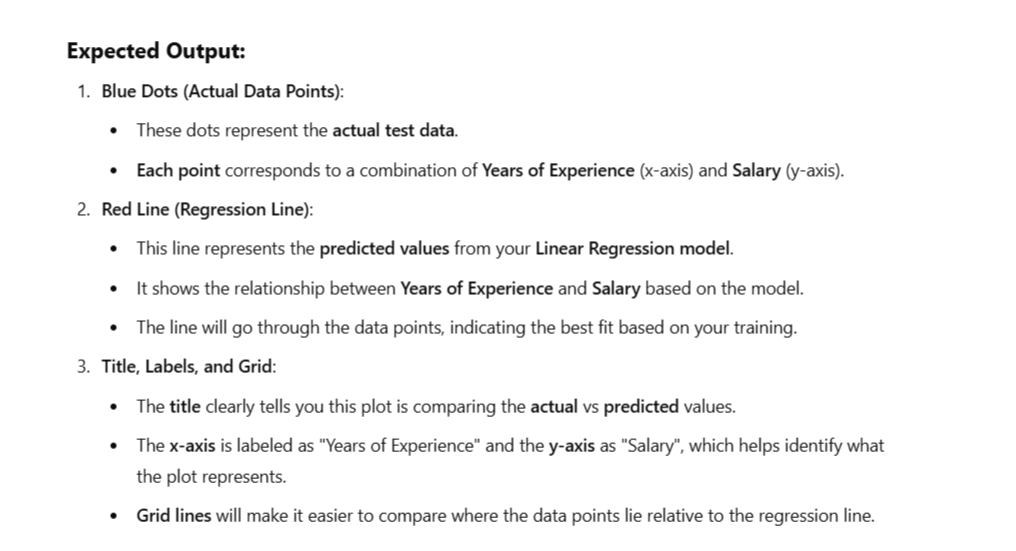